---

# Title: Heart Disease Prediction

<h1 style="font-family: 'poppins'; font-weight: bold; color: White;">👨‍💻Author: Muhammad Hassaan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/MHassaan2) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


---

# **Meta-Data (About Dataset)**

## **Context**

This is a `multivariate type of dataset` which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## **Content**

### **Column Descriptions:**

* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina 
  2. atypical angina
  3. non-anginal
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute


## **Acknowledgements**

### **Creators:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### **Relevant Papers:**
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

### **Citation Request:**

**_They would be:_**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## **Aims and Objective:**

We wil fill this after doing some Exploratory Data Analysis (EDA)

---

### **Import Libraries**

In [412]:
# import libraries 

# to handle the data 
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# to preprocess the data 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, RobustScaler, Normalizer
from sklearn.impute import SimpleImputer, KNNImputer 
# import iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

### **Load the dataset**

In [413]:
# load the dataset from csv file placed locally in our pc 
df = pd.read_csv("heart_disease_uci.csv")

# Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# print first 5 rows of the data 
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [414]:
# create a function to display headings 
def display(title):
    print('-'*50)
    print(title.upper())
    print('-'*50)

## **Exploratory Data Analysis (EDA)**
* ### Explore Each Column

In [415]:
# exploring the datatype of each column 
display('Data types')
df.info()

--------------------------------------------------
DATA TYPES
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [416]:
# data shape 
df.shape

(920, 16)

In [417]:
# print column names 
display('Columns')
df.columns

--------------------------------------------------
COLUMNS
--------------------------------------------------


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

**1. `id`**

In [418]:
# id column 
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

**2. `age`**

In [419]:
# age column 
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

In [420]:
# lets summarize the age column 
display('Summary of Age Column')
df['age'].describe()

--------------------------------------------------
SUMMARY OF AGE COLUMN
--------------------------------------------------


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

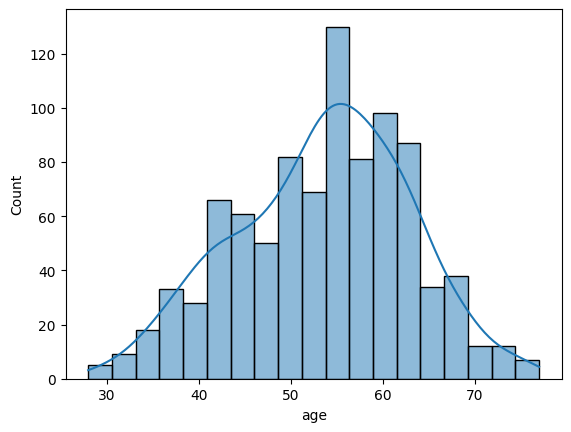

In [421]:
# draw a histogram to see the distribution of age  column 
sns.histplot(data=df, x='age', kde=True)

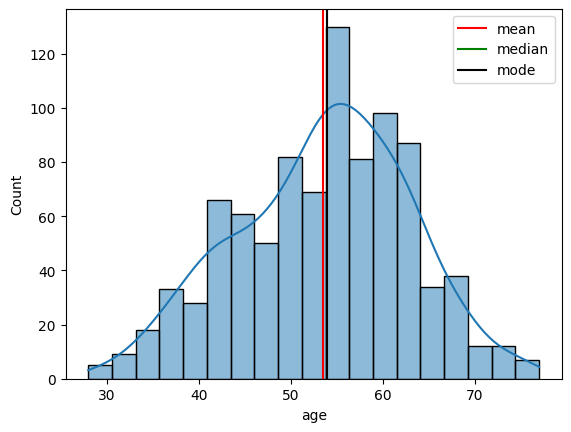

Mean: 53.51086956521739
Median: 54.0
Mode: 54


In [422]:
# plot the mean, median, and mode of age column using seaborn library 
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='black', label='mode')
plt.legend()
plt.show()

# print the value of mean, median, and mode of ag column 
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

**3. `sex`**

### **Let's explore the gender based distribution of the dataset for age column.**

In [423]:
# plot the histogram of age column using plotly and coloring this by `sex`
fig = px.histogram(df, x="age", color="sex")
fig.show()

In [424]:
# find the values of sex column 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [425]:
# calculate the percentage of male and female value counts in the data 
male_counts = 726
female_counts = 194
total_counts = male_counts + female_counts

# calculate the percentage
male_percentage = (male_counts / total_counts) * 100
female_percentage = (female_counts / total_counts) * 100

# print the results
display("Percentage of Male and Female")
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female percentage in the data: {female_percentage:.2f}%")

# difference
difference = ((male_counts - female_counts) / female_counts) * 100

# print the difference
display("Difference Percentage of Male and Female")
print(f"Males are: {difference:.2f}% more than females in the data.")

--------------------------------------------------
PERCENTAGE OF MALE AND FEMALE
--------------------------------------------------
Male percentage in the data: 78.91%
Female percentage in the data: 21.09%
--------------------------------------------------
DIFFERENCE PERCENTAGE OF MALE AND FEMALE
--------------------------------------------------
Males are: 274.23% more than females in the data.


In [426]:
# find the value counts of age column  grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [427]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**4. `dataset`**

In [428]:
# lets deal with data set column 
# find the unique values in dataset column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [429]:
# find unique values count in dataset column 
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [430]:
# plot the barplot of dataset column with plotly 
fig = px.bar(df, x='dataset', color='sex')
fig.show()

<Axes: xlabel='dataset', ylabel='count'>

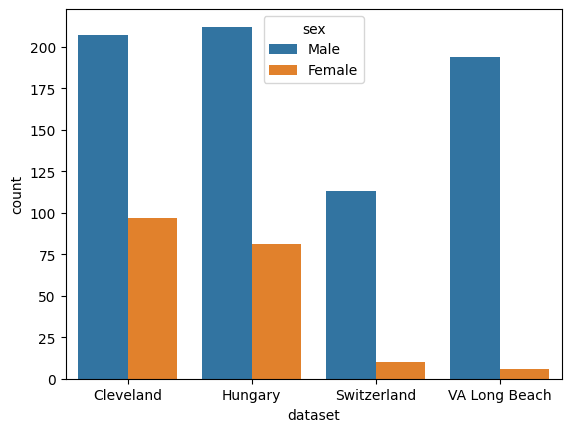

In [431]:
# we can also plot this using countplot (seaborn library)
sns.countplot(data=df, x='dataset', hue='sex')

In [432]:
# print the value counts of dataset column grouped by sex 
display('Value Counts of `dataset` column Grouped by `sex` column')
print(df.groupby('sex')['dataset'].value_counts())

--------------------------------------------------
VALUE COUNTS OF `DATASET` COLUMN GROUPED BY `SEX` COLUMN
--------------------------------------------------
sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [433]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(df, x="age", color="dataset")
fig.show()

In [434]:
# print the mean, median, and mode of the data 
display("Mean, Median, and Mode of the `age` column grouped by `dataset` column")
print(f"Mean of the Dataset: {df.groupby('dataset')['age'].mean()}")
print('-'*40)
print(f"Median of the Dataset: {df.groupby('dataset')['age'].median()}")
print('-'*40)
print(f"Mode of the Dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print('-'*40)

--------------------------------------------------
MEAN, MEDIAN, AND MODE OF THE `AGE` COLUMN GROUPED BY `DATASET` COLUMN
--------------------------------------------------
Mean of the Dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------------
Median of the Dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------------
Mode of the Dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------------


**5. `cp (chest pain)`**

### **Lets Explore cp (Chest Pain) column:**

In [435]:
# value counts of cp column 
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

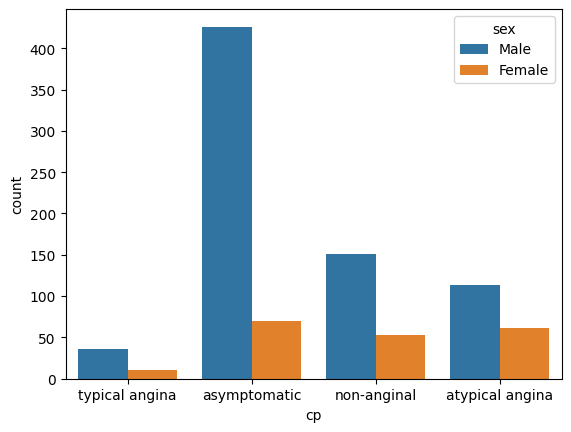

In [436]:
# count plot of cp column by sex column 
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

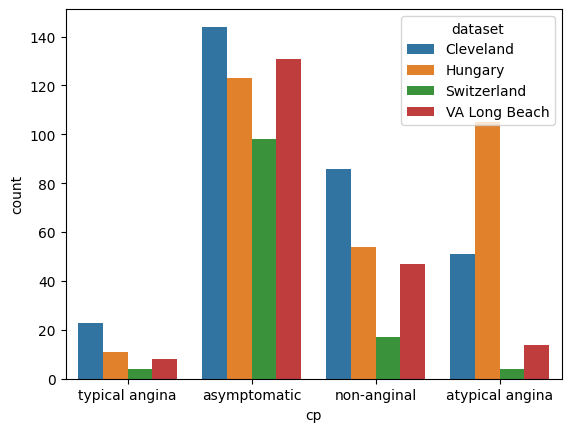

In [437]:
# count plit of cp column by dataset column 
sns.countplot(data=df, x='cp', hue='dataset')

In [438]:
# draw the column grouped by cp column using plotly 
fig = px.histogram(df, x="age", color="cp")
fig.show()

**6. `trestbps`**

The normal resting blood pressure is 120/80 mm Hg.

* Blood pressure readings of 140/80 mm Hg and higher can increase a person’s risk of heart attack and stroke. 
* But a too-low blood pressure from medications—120/70 mm Hg or lower—may also be dangerous.
* 

In [439]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [440]:
df['trestbps'].min(), df['trestbps'].max()

(np.float64(0.0), np.float64(200.0))

In [441]:
# Bin the data based on Blood pressure values (high and low)
df['bp_group'] = pd.cut(df['trestbps'], bins=[0, 120, 139, 159, 180, 200], labels=['Normal', 'Prehypertension', 'Hypertension (Stage 1)', 'Hypertension (Stage 2)', 'Hypertensive Crisis'])

# Count the number of people in each bin
df.groupby('bp_group')['dataset'].value_counts()

bp_group                dataset      
Normal                  Hungary          105
                        Cleveland         97
                        Switzerland       53
                        VA Long Beach     37
Prehypertension         Cleveland        109
                        Hungary           74
                        VA Long Beach     50
                        Switzerland       24
Hypertension (Stage 1)  Hungary           80
                        Cleveland         72
                        VA Long Beach     39
                        Switzerland       27
Hypertension (Stage 2)  Hungary           31
                        Cleveland         24
                        VA Long Beach     16
                        Switzerland       14
Hypertensive Crisis     Switzerland        3
                        Cleveland          2
                        Hungary            2
                        VA Long Beach      1
Name: count, dtype: int64

In [442]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


In [443]:
# find the value counts of trestbps column 
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

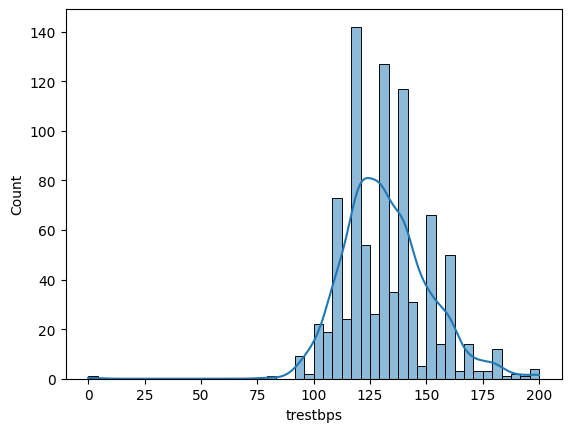

In [444]:
# create a histplot of trestbps column 
sns.histplot(data=df, x='trestbps', kde=True)

In [445]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


**7. `chol`**

**chol (Serum Cholesterol):**

* Serum cholesterol in mg/dl.
* Typical range: 126 to 564 mg/dl.

In [446]:
# descibe the `chol` column
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [447]:
# check minimum and maximum values 
df['chol'].min(), df['chol'].max()

(np.float64(0.0), np.float64(603.0))

In [448]:
df['chol'].isnull().sum()

np.int64(30)

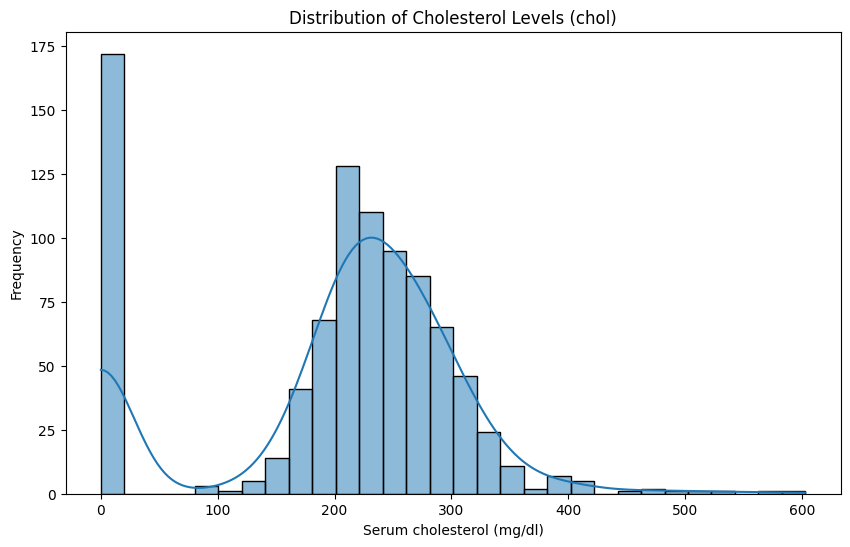

In [449]:
# make distribution plot of "chol" column
plt.figure(figsize=(10,6)) 
sns.histplot(data=df, x='chol', kde=True, bins=30)
plt.title('Distribution of Cholesterol Levels (chol)')
plt.xlabel('Serum cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='chol'>

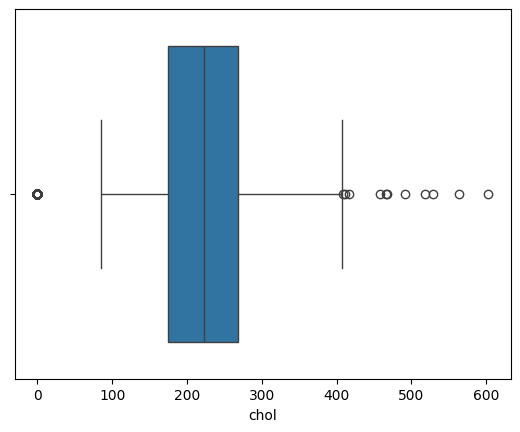

In [450]:
# box plot to identify outliers 
sns.boxplot(data=df, x='chol')

In [451]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


**8. `fbs`**

**Fasting Blood Sugar**

* Fasting blood sugar > 120 mg/dl.
* 1 = true, 0 = false.

In [452]:
# summary statistics 
display("Summary of `fbs` column")
df['fbs'].describe()

--------------------------------------------------
SUMMARY OF `FBS` COLUMN
--------------------------------------------------


count       830
unique        2
top       False
freq        692
Name: fbs, dtype: object

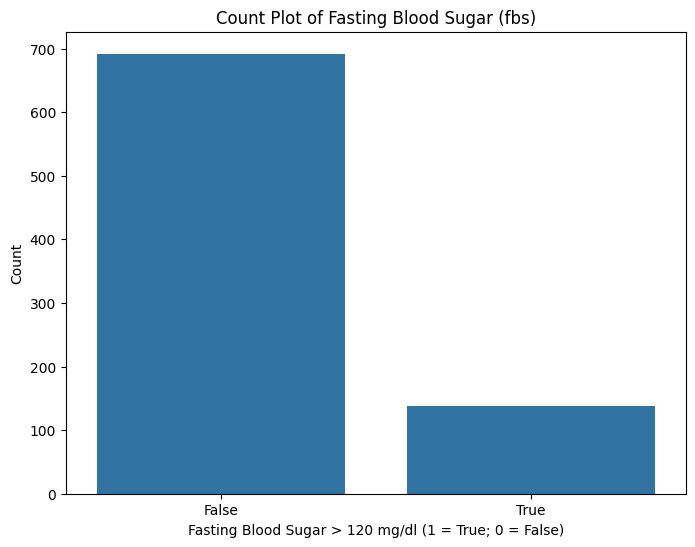

In [453]:
# count plot of fbs 
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', data=df)
plt.title('Count Plot of Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)')
plt.ylabel('Count')
plt.show()

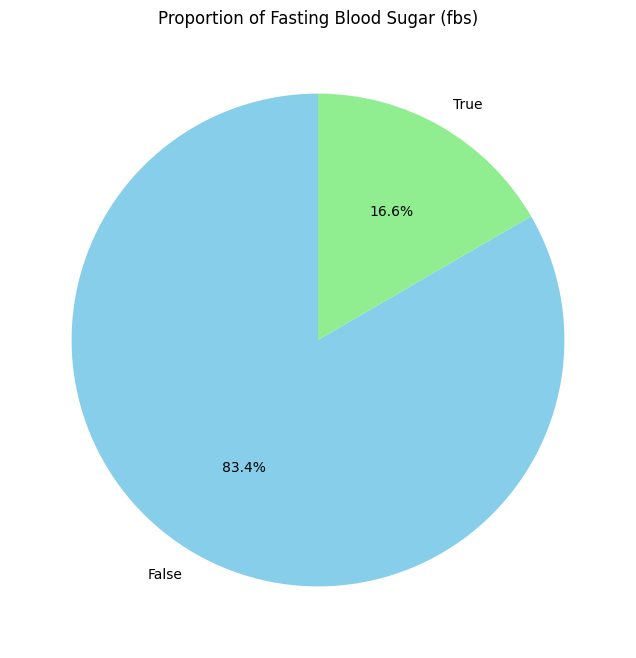

In [454]:
# Pie chart for 'fbs'
plt.figure(figsize=(8, 8))
df['fbs'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Fasting Blood Sugar (fbs)')
plt.ylabel('')
plt.show()


In [455]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'bp_group'],
      dtype='object')

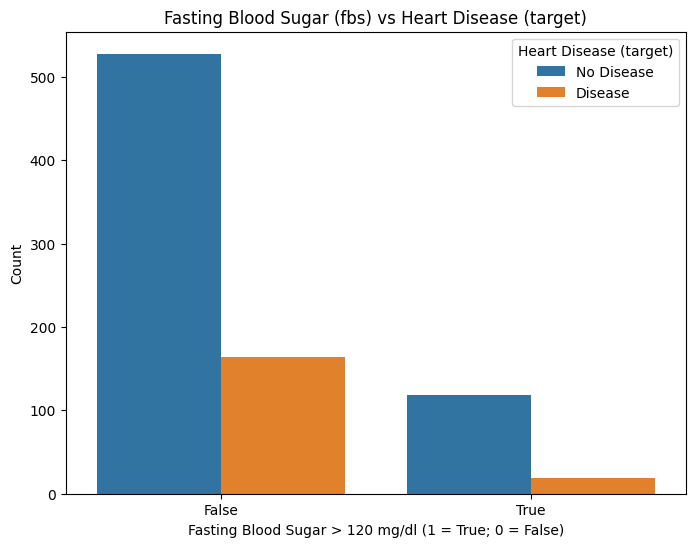

In [456]:
# Relationship between 'fbs' and 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='sex', data=df)
plt.title('Fasting Blood Sugar (fbs) vs Heart Disease (target)')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (target)', labels=['No Disease', 'Disease'])
plt.show()

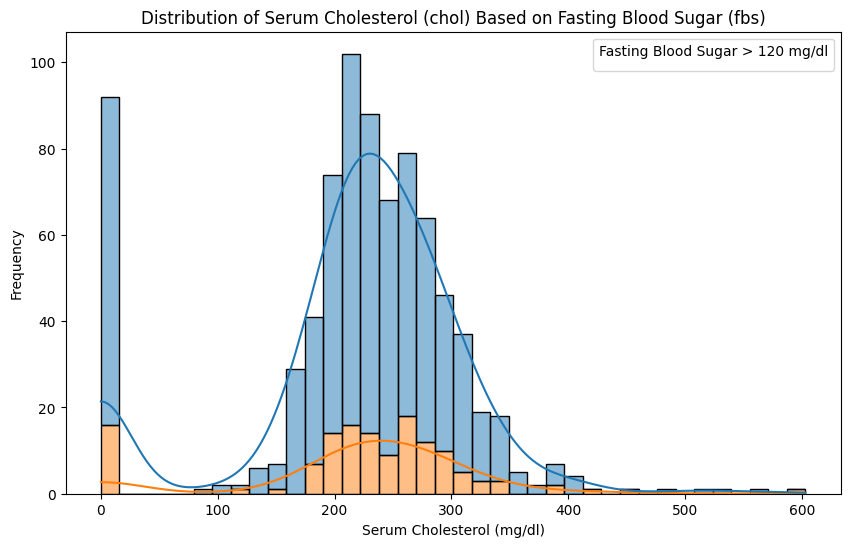

In [457]:
# Distribution of 'chol' based on 'fbs'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='fbs', multiple='stack', kde=True)
plt.title('Distribution of Serum Cholesterol (chol) Based on Fasting Blood Sugar (fbs)')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.legend(title='Fasting Blood Sugar > 120 mg/dl')
plt.show()

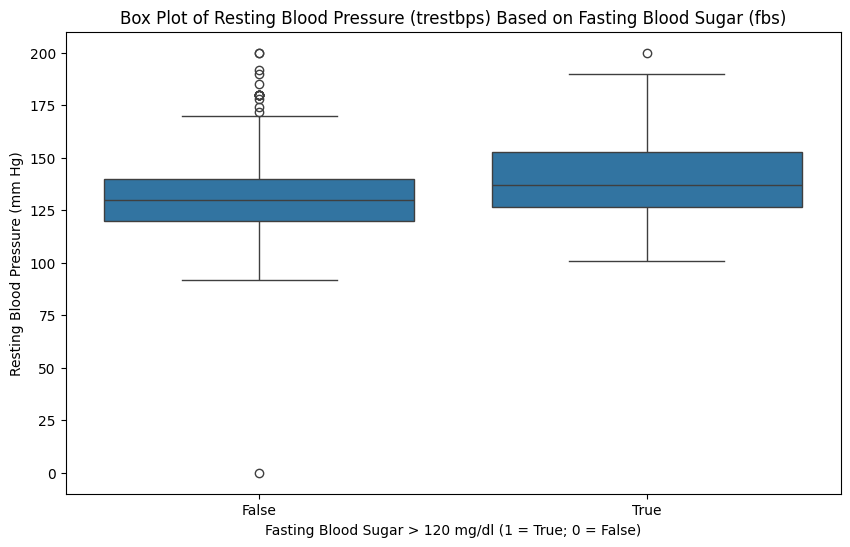

In [458]:
# Box plot of 'trestbps' based on 'fbs'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fbs', y='trestbps', data=df)
plt.title('Box Plot of Resting Blood Pressure (trestbps) Based on Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

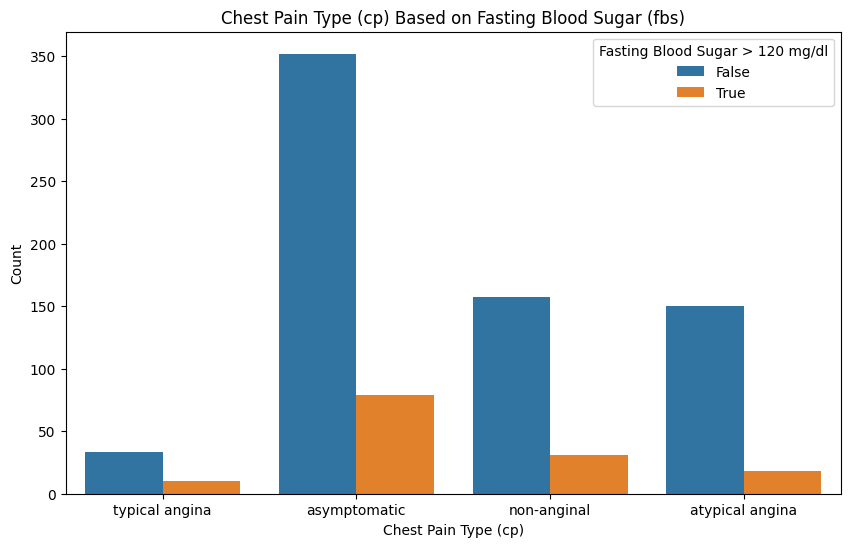

In [459]:
# Bar plot of 'cp' based on 'fbs'
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='fbs', data=df)
plt.title('Chest Pain Type (cp) Based on Fasting Blood Sugar (fbs)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Fasting Blood Sugar > 120 mg/dl')
plt.show()


**9. `restecg`**

**restecg: Resting electrocardiographic results.**

* 0: Normal
* 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

restecg
lv hypertrophy      1.164894
normal              0.838475
st-t abnormality    1.301676
Name: num, dtype: float64


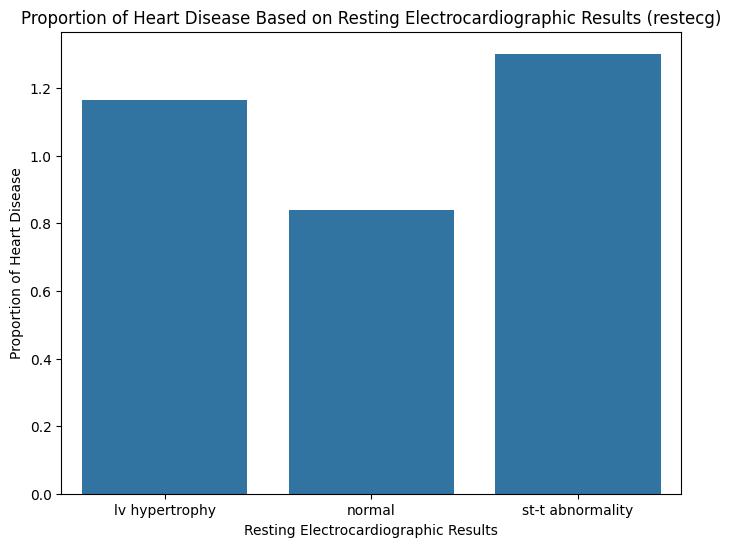

In [460]:
# proportion of heart disease based on restecg 
heart_disease_propertion = df.groupby('restecg')['num'].mean()
print(heart_disease_propertion)

# plot 
plt.figure(figsize=(8, 6))
sns.barplot(x=heart_disease_propertion.index, y=heart_disease_propertion.values)
plt.title('Proportion of Heart Disease Based on Resting Electrocardiographic Results (restecg)')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Proportion of Heart Disease')
plt.show()

In [461]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'bp_group'],
      dtype='object')

num                        0           1           2           3           4
restecg                                                                     
lv hypertrophy    153.518987  140.166667  135.500000  130.040000  136.461538
normal            149.306513  129.670732  126.018519  117.711111  123.750000
st-t abnormality  138.901961  126.772727  128.384615  115.791667  112.000000


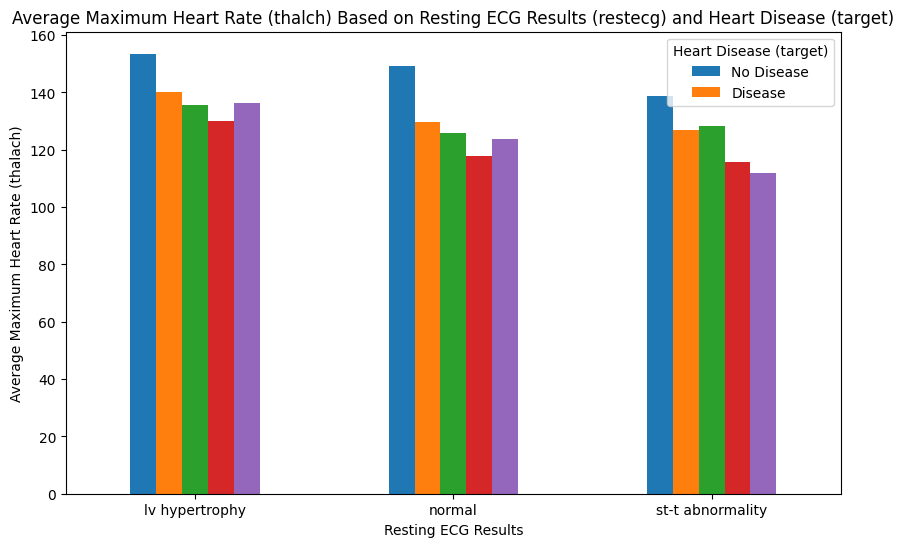

In [462]:
# Average 'thalach' based on 'restecg' and 'target'
average_thalach = df.groupby(['restecg', 'num'])['thalch'].mean().unstack()
print(average_thalach)

# Visualize the average thalach
average_thalach.plot(kind='bar', figsize=(10, 6))
plt.title('Average Maximum Heart Rate (thalch) Based on Resting ECG Results (restecg) and Heart Disease (target)')
plt.xlabel('Resting ECG Results')
plt.ylabel('Average Maximum Heart Rate (thalach)')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease (target)', labels=['No Disease', 'Disease'])
plt.show()


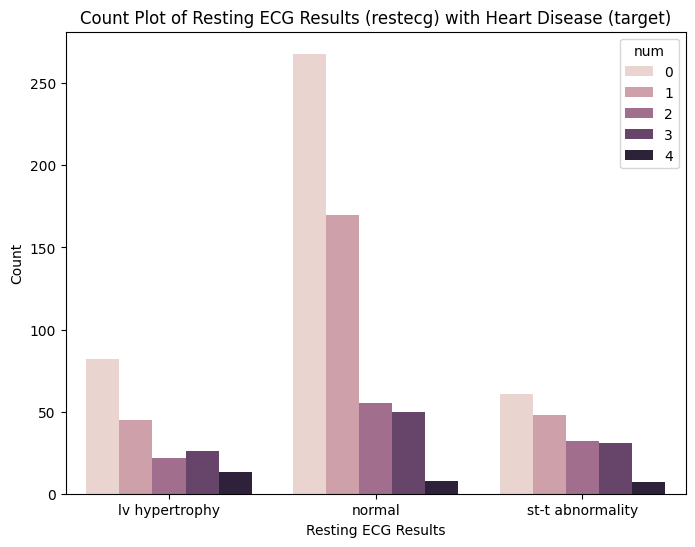

In [463]:
# Count plot for 'restecg' with 'target'
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='num', data=df)
plt.title('Count Plot of Resting ECG Results (restecg) with Heart Disease (target)')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.show()

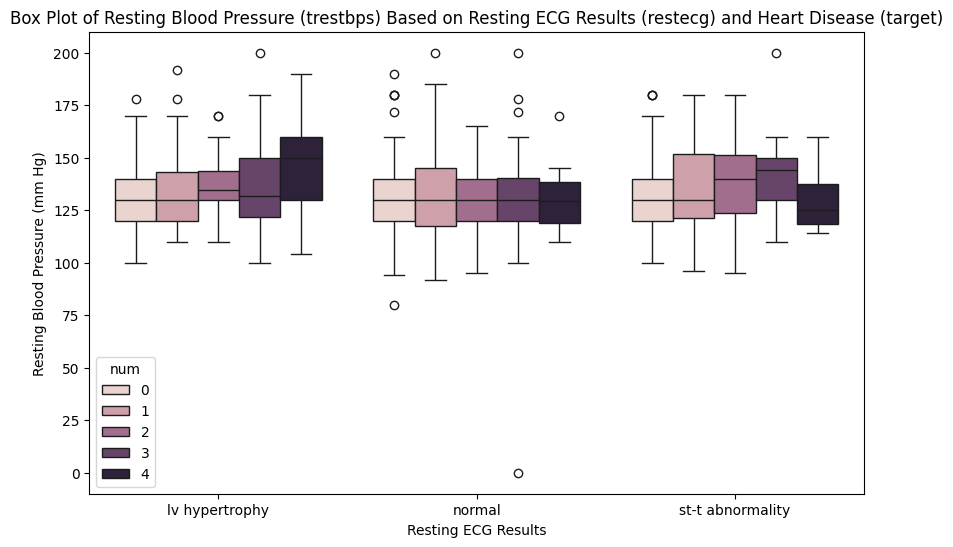

In [464]:
# Box plot of 'trestbps' based on 'restecg' and 'target'
plt.figure(figsize=(10, 6))
sns.boxplot(x='restecg', y='trestbps', hue='num', data=df)
plt.title('Box Plot of Resting Blood Pressure (trestbps) Based on Resting ECG Results (restecg) and Heart Disease (target)')
plt.xlabel('Resting ECG Results')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


In [465]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


10. `thalch` 

* Maximum heart rate achieved during exercise (measured in beats per minute).

thalch
50-100     1.564706
101-150    1.147117
151-200    0.478261
Name: num, dtype: float64


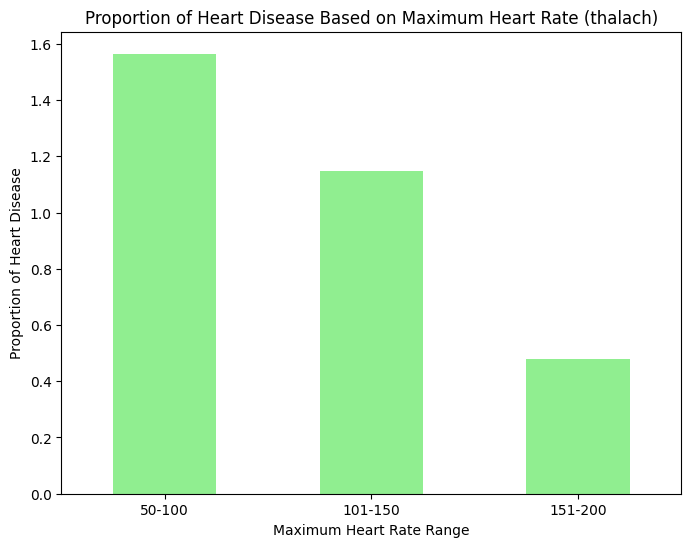

In [466]:
# Proportion of heart disease based on 'thalach' (categorizing into ranges)
thalch_ranges = pd.cut(df['thalch'], bins=[50, 100, 150, 200], labels=['50-100', '101-150', '151-200'])
proportion_heart_disease_thalch = df.groupby(thalch_ranges)['num'].mean()
print(proportion_heart_disease_thalch)

# Visualize the proportion
plt.figure(figsize=(8, 6))
proportion_heart_disease_thalch.plot(kind='bar', color='lightgreen')
plt.title('Proportion of Heart Disease Based on Maximum Heart Rate (thalach)')
plt.xlabel('Maximum Heart Rate Range')
plt.ylabel('Proportion of Heart Disease')
plt.xticks(rotation=0)
plt.show()


thalch
50-100     151.927711
101-150    190.059794
151-200    230.501859
Name: chol, dtype: float64


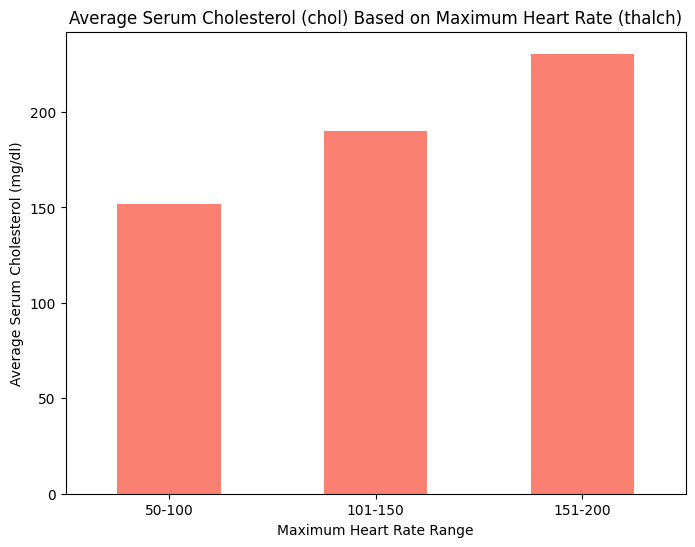

In [467]:
# Average 'chol' based on 'thalch' ranges
thalch_ranges = pd.cut(df['thalch'], bins=[50, 100, 150, 200], labels=['50-100', '101-150', '151-200'])
average_chol_thalch = df.groupby(thalch_ranges)['chol'].mean()
print(average_chol_thalch)

# Visualize the average cholesterol levels
plt.figure(figsize=(8, 6))
average_chol_thalch.plot(kind='bar', color='salmon')
plt.title('Average Serum Cholesterol (chol) Based on Maximum Heart Rate (thalch)')
plt.xlabel('Maximum Heart Rate Range')
plt.ylabel('Average Serum Cholesterol (mg/dl)')
plt.xticks(rotation=0)
plt.show()

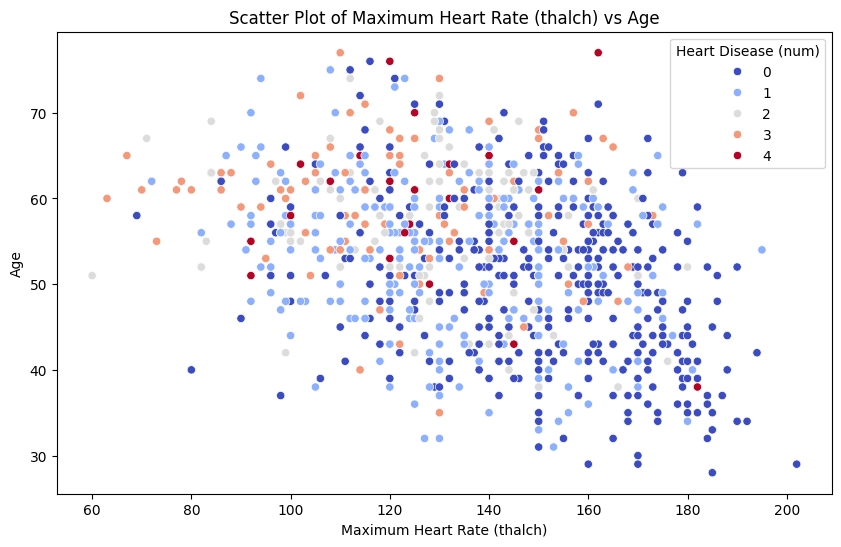

In [468]:
# Scatter plot of 'thalch' vs 'age', colored by 'num'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thalch', y='age', hue='num', palette='coolwarm', data=df)
plt.title('Scatter Plot of Maximum Heart Rate (thalch) vs Age')
plt.xlabel('Maximum Heart Rate (thalch)')
plt.ylabel('Age')
plt.legend(title='Heart Disease (num)')
plt.show()

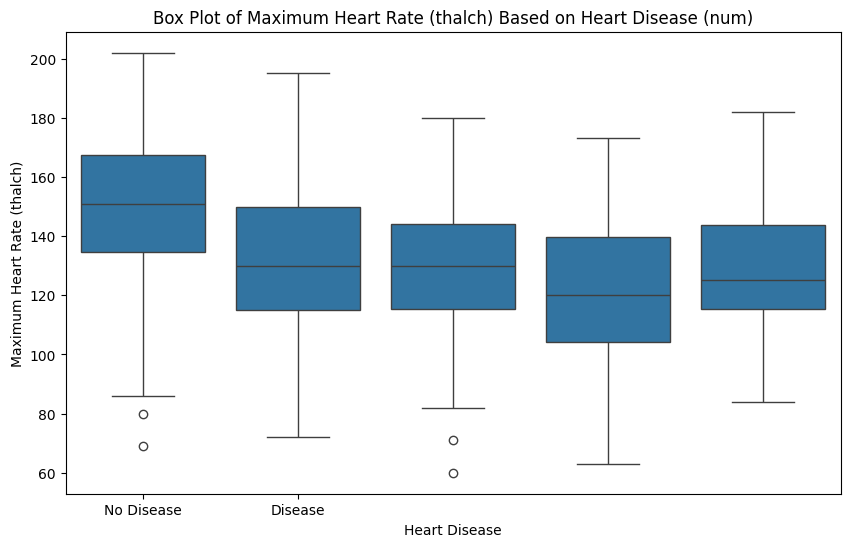

In [469]:
# Box plot of 'thalch' based on heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='thalch', data=df)
plt.title('Box Plot of Maximum Heart Rate (thalch) Based on Heart Disease (num)')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate (thalch)')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [470]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


11.  `exang` 

* Exercise induced angina (True = Yes, False = No)

In [471]:
import plotly.express as px

# Proportion of heart disease based on 'exang'
proportion_heart_disease_exang = df.groupby('exang')['num'].mean().reset_index()
proportion_heart_disease_exang.columns = ['Exercise Induced Angina', 'Proportion of Heart Disease']

# Create bar plot
fig = px.bar(proportion_heart_disease_exang, x='Exercise Induced Angina', y='Proportion of Heart Disease',
             title='Proportion of Heart Disease Based on Exercise Induced Angina (exang)',
             labels={'Exercise Induced Angina': 'Exercise Induced Angina', 'Proportion of Heart Disease': 'Proportion of Heart Disease'},
             color='Proportion of Heart Disease', color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

In [472]:
# Scatter plot of 'age' vs 'chol', colored by 'exang'
fig = px.scatter(df, x='age', y='chol', color='exang', 
                 title='Scatter Plot of Age vs Serum Cholesterol (chol) Colored by Exercise Induced Angina (exang)',
                 labels={'age': 'Age', 'chol': 'Serum Cholesterol (mg/dl)', 'exang': 'Exercise Induced Angina'},
                 color_continuous_scale=px.colors.sequential.Jet)
fig.show()

In [473]:
# Distribution of 'exang' based on heart disease status
fig = px.histogram(df, x='exang', color='num', 
                   title='Distribution of Exercise Induced Angina (exang) Based on Heart Disease (num)',
                   labels={'exang': 'Exercise Induced Angina', 'num': 'Heart Disease'},
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.show()


In [474]:
# Count plot for 'exang'
fig = px.histogram(df, x='exang', title='Count Plot of Exercise Induced Angina (exang)',
                   labels={'exang': 'Exercise Induced Angina'},
                   color_discrete_map={0: 'lightblue', 1: 'lightcoral'})
fig.show()


12. `oldpeak` 

* Depression of the ST segment (measured in mm) during exercise relative to rest.

In [475]:
# Proportion of heart disease based on 'oldpeak' (categorizing into ranges)
oldpeak_ranges = pd.cut(df['oldpeak'], bins=[-1, 0, 1, 2, 3], labels=['<=0', '0-1', '1-2', '2-3'])
proportion_heart_disease_oldpeak = df.groupby(oldpeak_ranges)['num'].mean().reset_index()
proportion_heart_disease_oldpeak.columns = ['Oldpeak Range', 'Proportion of Heart Disease']

# Create bar plot
fig = px.bar(proportion_heart_disease_oldpeak, x='Oldpeak Range', y='Proportion of Heart Disease',
             title='Proportion of Heart Disease Based on ST Depression (oldpeak)',
             labels={'Oldpeak Range': 'ST Depression Range', 'Proportion of Heart Disease': 'Proportion of Heart Disease'},
             color='Proportion of Heart Disease', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [476]:
# Average 'chol' based on 'oldpeak' ranges
oldpeak_ranges = pd.cut(df['oldpeak'], bins=[-1, 0, 1, 2, 3], labels=['<=0', '0-1', '1-2', '2-3'])
average_chol_oldpeak = df.groupby(oldpeak_ranges)['chol'].mean().reset_index()
average_chol_oldpeak.columns = ['Oldpeak Range', 'Average Serum Cholesterol']

# Create bar plot
fig = px.bar(average_chol_oldpeak, x='Oldpeak Range', y='Average Serum Cholesterol',
             title='Average Serum Cholesterol (chol) Based on ST Depression (oldpeak)',
             labels={'Oldpeak Range': 'ST Depression Range', 'Average Serum Cholesterol': 'Average Serum Cholesterol (mg/dl)'},
             color='Average Serum Cholesterol', color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [477]:
# Scatter plot of 'oldpeak' vs 'thalch', colored by 'num'
fig = px.scatter(df, x='oldpeak', y='thalch', color='num',
                 title='Scatter Plot of ST Depression (oldpeak) vs Maximum Heart Rate (thalch)',
                 labels={'oldpeak': 'ST Depression (mm)', 'thalch': 'Maximum Heart Rate (thalch)', 'num': 'Heart Disease'},
                 color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


In [478]:
# Distribution of 'oldpeak' based on heart disease status
fig = px.histogram(df, x='oldpeak', color='num',
                   title='Distribution of ST Depression (oldpeak) Based on Heart Disease (num)',
                   labels={'oldpeak': 'ST Depression (mm)', 'num': 'Heart Disease'},
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.show()

In [479]:
# Box plot of 'oldpeak' based on heart disease status
fig = px.box(df, x='num', y='oldpeak',
             title='Box Plot of ST Depression (oldpeak) Based on Heart Disease (num)',
             labels={'num': 'Heart Disease', 'oldpeak': 'ST Depression (mm)'},
             color='num')
fig.show()

In [480]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


13. `slope` 

* Slope of the peak exercise ST segment (values typically include 1, 2, and 3).

In [481]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


In [482]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [483]:
# Proportion of heart disease based on 'slope'
proportion_heart_disease_slope = df.groupby('slope')['num'].mean().reset_index()
proportion_heart_disease_slope.columns = ['Slope', 'Proportion of Heart Disease']

# Create bar plot
fig = px.bar(proportion_heart_disease_slope, x='Slope', y='Proportion of Heart Disease',
             title='Proportion of Heart Disease Based on Slope of Peak Exercise ST Segment (slope)',
             labels={'Slope': 'Slope of Peak Exercise ST Segment', 'Proportion of Heart Disease': 'Proportion of Heart Disease'},
             color='Proportion of Heart Disease', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()


In [484]:
# Average 'chol' based on 'slope'
average_chol_slope = df.groupby('slope')['chol'].mean().reset_index()
average_chol_slope.columns = ['Slope', 'Average Serum Cholesterol']

# Create bar plot
fig = px.bar(average_chol_slope, x='Slope', y='Average Serum Cholesterol',
             title='Average Serum Cholesterol (chol) Based on Slope of Peak Exercise ST Segment (slope)',
             labels={'Slope': 'Slope of Peak Exercise ST Segment', 'Average Serum Cholesterol': 'Average Serum Cholesterol (mg/dl)'},
             color='Average Serum Cholesterol', color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()


In [485]:
# Distribution of 'slope' based on heart disease status
fig = px.histogram(df, x='slope', color='num',
                   title='Distribution of Slope of Peak Exercise ST Segment (slope) Based on Heart Disease (num)',
                   labels={'slope': 'Slope of Peak Exercise ST Segment', 'num': 'Heart Disease'},
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.show()


In [486]:
# Count plot for 'slope'
fig = px.histogram(df, x='slope', title='Count Plot of Slope of Peak Exercise ST Segment (slope)',
                   labels={'slope': 'Slope of Peak Exercise ST Segment'},
                   color_discrete_map={1: 'lightblue', 2: 'lightgreen', 3: 'lightcoral'})
fig.show()


In [487]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


14.  `ca` 

* number of major vessels (0-3) colored by fluoroscopy

In [488]:
# Proportion of heart disease based on 'ca'
proportion_heart_disease_ca = df.groupby('ca')['num'].mean().reset_index()
proportion_heart_disease_ca.columns = ['Number of Major Vessels', 'Proportion of Heart Disease']

# Create bar plot
fig = px.bar(proportion_heart_disease_ca, x='Number of Major Vessels', y='Proportion of Heart Disease',
             title='Proportion of Heart Disease Based on Number of Major Vessels (ca)',
             labels={'Number of Major Vessels': 'Number of Major Vessels', 'Proportion of Heart Disease': 'Proportion of Heart Disease'},
             color='Proportion of Heart Disease', color_continuous_scale=px.colors.sequential.Magma)
fig.show()

In [489]:
# Count plot for 'ca'
fig = px.histogram(df, x='ca', title='Count Plot of Number of Major Vessels (ca)',
                   labels={'ca': 'Number of Major Vessels'},
                   color_discrete_map={0: 'lightblue', 1: 'lightgreen', 2: 'lightcoral', 3: 'lightsalmon'})
fig.show()


In [490]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


15. `thal`

**thal: Type of thalassemia.**

It typically has the following values:
* Normal
* Fixed defect
* Reversible defect

In [491]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [492]:
import plotly.express as px

# Proportion of heart disease based on 'thal'
proportion_heart_disease_thal = df.groupby('thal')['num'].mean().reset_index()
proportion_heart_disease_thal.columns = ['Thalassemia Type', 'Proportion of Heart Disease']

# Create bar plot
fig = px.bar(proportion_heart_disease_thal, x='Thalassemia Type', y='Proportion of Heart Disease',
             title='Proportion of Heart Disease Based on Thalassemia Type (thal)',
             labels={'Thalassemia Type': 'Thalassemia Type', 'Proportion of Heart Disease': 'Proportion of Heart Disease'},
             color='Proportion of Heart Disease', color_continuous_scale=px.colors.sequential.Cividis)
fig.show()


In [493]:
# Count plot for 'thal'
fig = px.histogram(df, x='thal', title='Count Plot of Thalassemia Type (thal)',
                   labels={'thal': 'Thalassemia Type'},
                   color_discrete_map={3: 'lightblue', 6: 'lightgreen', 7: 'lightcoral'})
fig.show()


16. `num` 

* num: Presence of heart disease (binary). Values typically include:

In [494]:
import plotly.express as px

# Plot distribution of other features based on heart disease status
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'slope', 'ca', 'thal']
for feature in features:
    fig = px.box(df, x='num', y=feature,
                 title=f'Box Plot of {feature} Based on Heart Disease (num)',
                 labels={'num': 'Heart Disease', feature: feature},
                 color='num')
    fig.show()


In [495]:
# Count plot for 'num'
fig = px.histogram(df, x='num', title='Count Plot of Heart Disease (num)',
                   labels={'num': 'Heart Disease'},
                   color_discrete_map={0: 'lightblue', 1: 'lightcoral'})
fig.show()


17. `bp_group` 

* This column likely represents a grouping or category related to blood pressure levels.

bp_group
Normal                    0.794521
Prehypertension           0.957198
Hypertension (Stage 1)    1.032110
Hypertension (Stage 2)    1.270588
Hypertensive Crisis       2.000000
Name: num, dtype: float64


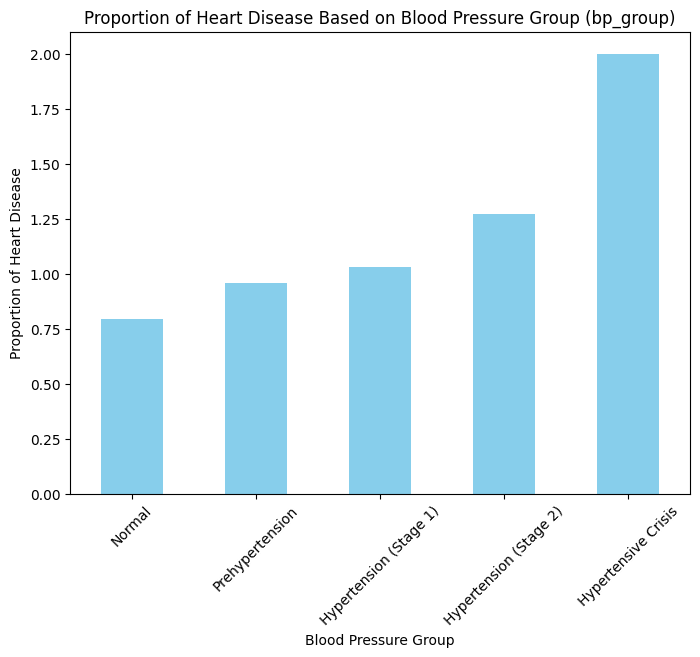

In [496]:
# Proportion of heart disease based on 'bp_group'
heart_disease_proportion_bp_group = df.groupby('bp_group')['num'].mean()
print(heart_disease_proportion_bp_group)

# Visualize the proportion
plt.figure(figsize=(8, 6))
heart_disease_proportion_bp_group.plot(kind='bar', color='skyblue')
plt.title('Proportion of Heart Disease Based on Blood Pressure Group (bp_group)')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Proportion of Heart Disease')
plt.xticks(rotation=45)
plt.show()


bp_group
Normal                    185.302817
Prehypertension           209.780876
Hypertension (Stage 1)    208.384615
Hypertension (Stage 2)    206.170732
Hypertensive Crisis       162.125000
Name: chol, dtype: float64


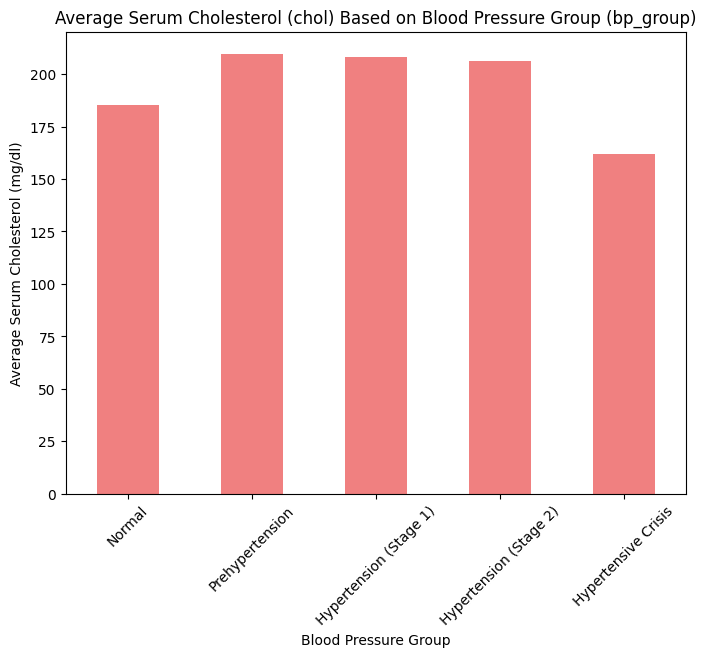

In [497]:
# Average 'chol' based on 'bp_group'
average_chol_bp_group = df.groupby('bp_group')['chol'].mean()
print(average_chol_bp_group)

# Visualize the average cholesterol levels
plt.figure(figsize=(8, 6))
average_chol_bp_group.plot(kind='bar', color='lightcoral')
plt.title('Average Serum Cholesterol (chol) Based on Blood Pressure Group (bp_group)')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Average Serum Cholesterol (mg/dl)')
plt.xticks(rotation=45)
plt.show()


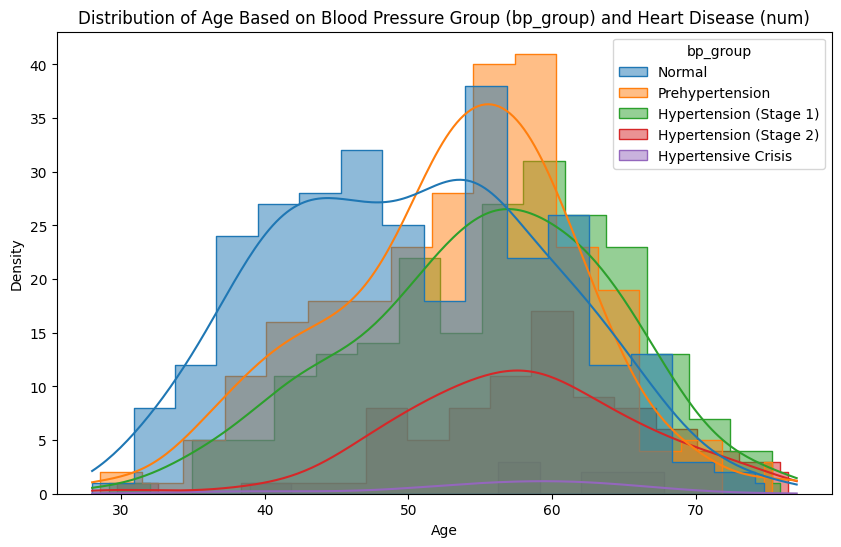

In [498]:
# Distribution of 'age' based on 'bp_group' and 'num'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='bp_group', element='step', multiple='dodge', kde=True)
plt.title('Distribution of Age Based on Blood Pressure Group (bp_group) and Heart Disease (num)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

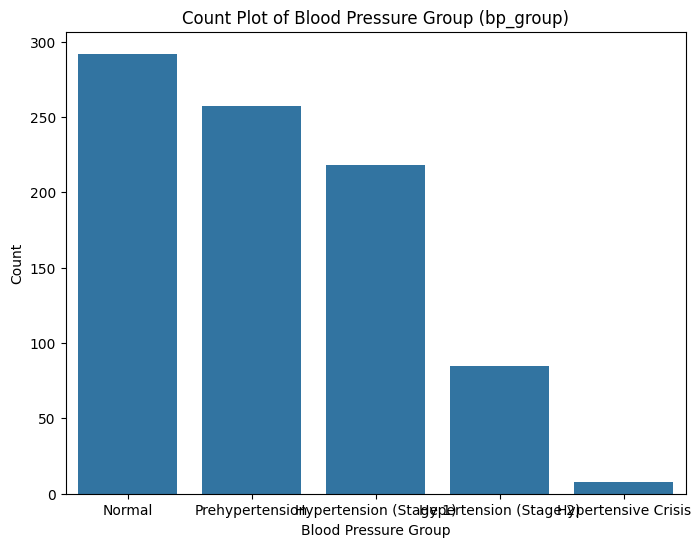

In [499]:
# Count plot for 'bp_group'
plt.figure(figsize=(8, 6))
sns.countplot(x='bp_group', data=df)
plt.title('Count Plot of Blood Pressure Group (bp_group)')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Count')
plt.show()

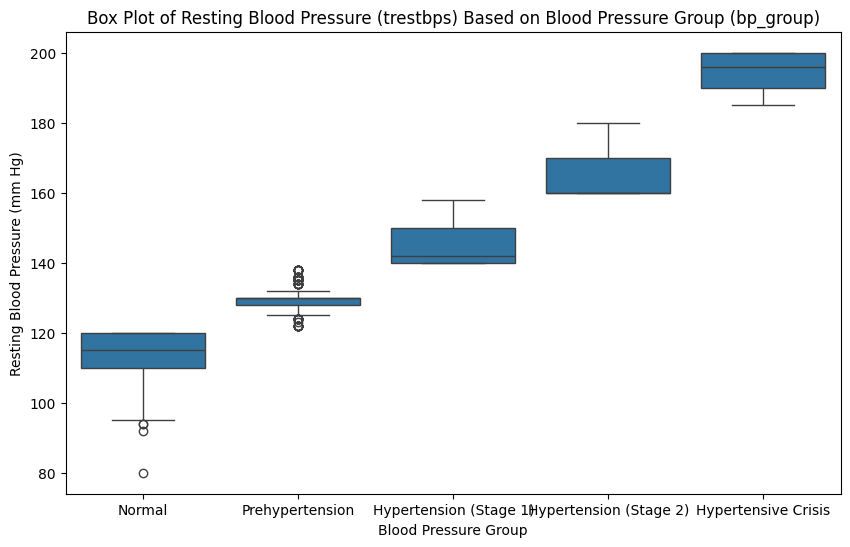

In [500]:
# Box plot of 'trestbps' based on 'bp_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='bp_group', y='trestbps', data=df)
plt.title('Box Plot of Resting Blood Pressure (trestbps) Based on Blood Pressure Group (bp_group)')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

---

<h1 style="font-family: 'poppins'; font-weight: bold; color: White;">Dealing With Missing Values</h1>

We are going to make a function to deal with missing values

---

In [501]:
display("Missing Values")
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

--------------------------------------------------
MISSING VALUES
--------------------------------------------------


['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'bp_group']

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    int64   
 2   sex       920 non-null    object  
 3   dataset   920 non-null    object  
 4   cp        920 non-null    object  
 5   trestbps  861 non-null    float64 
 6   chol      890 non-null    float64 
 7   fbs       830 non-null    object  
 8   restecg   918 non-null    object  
 9   thalch    865 non-null    float64 
 10  exang     865 non-null    object  
 11  oldpeak   858 non-null    float64 
 12  slope     611 non-null    object  
 13  ca        309 non-null    float64 
 14  thal      434 non-null    object  
 15  num       920 non-null    int64   
 16  bp_group  860 non-null    category
dtypes: category(1), float64(5), int64(3), object(8)
memory usage: 116.2+ KB


In [503]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num', 'bp_group']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'trestbps', 'age', 'chol']

In [504]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


---

### Imputation Functions

#### `impute_categorical_missing_data`

This function handles missing values in categorical columns by leveraging a Random Forest Classifier for imputation. Here’s a step-by-step breakdown:

1. **Separate Missing and Non-Missing Data:**
   - `df_null` contains rows where the `passed_col` column is missing.
   - `df_not_null` contains rows with non-missing values in the `passed_col` column.

2. **Prepare Data for Modeling:**
   - `X` is created by dropping the `passed_col` from `df_not_null`.
   - `y` is the `passed_col` from `df_not_null`.
   - `other_missing_cols` is a list of columns with missing values, excluding the current `passed_col`.

3. **Label Encoding:**
   - Convert categorical variables in `X` and `y` to numerical values using `LabelEncoder`.

4. **Impute Other Missing Values:**
   - Use `IterativeImputer` with `RandomForestRegressor` to impute missing values in `X`.

5. **Model Training and Evaluation:**
   - Split data into training and test sets.
   - Train a `RandomForestClassifier` on the training set and evaluate its performance on the test set.
   - Print the accuracy of the imputation.

6. **Impute Missing Values in Null Data:**
   - Apply the same preprocessing steps to `df_null`.
   - Predict missing values using the trained `RandomForestClassifier`.
   - If `passed_col` is categorical, map predictions back to the original categories.

7. **Combine Data:**
   - Merge `df_not_null` and `df_null` to get the completed DataFrame.

#### `impute_continuous_missing_data`

This function deals with missing values in continuous columns using a Random Forest Regressor for imputation. Here’s a detailed breakdown:

1. **Separate Missing and Non-Missing Data:**
   - `df_null` contains rows where the `passed_col` column is missing.
   - `df_not_null` contains rows with non-missing values in the `passed_col` column.

2. **Prepare Data for Modeling:**
   - `X` is created by dropping the `passed_col` from `df_not_null`.
   - `y` is the `passed_col` from `df_not_null`.
   - `other_missing_cols` is a list of columns with missing values, excluding the current `passed_col`.

3. **Label Encoding:**
   - Convert categorical variables in `X` to numerical values using `LabelEncoder`.

4. **Impute Other Missing Values:**
   - Use `IterativeImputer` with `RandomForestRegressor` to impute missing values in `X`.

5. **Model Training and Evaluation:**
   - Split data into training and test sets.
   - Train a `RandomForestRegressor` on the training set and evaluate its performance using metrics like MAE, RMSE, and R² on the test set.
   - Print these evaluation metrics.

6. **Impute Missing Values in Null Data:**
   - Apply the same preprocessing steps to `df_null`.
   - Predict missing values using the trained `RandomForestRegressor`.

7. **Combine Data:**
   - Merge `df_not_null` and `df_null` to get the completed DataFrame.

---


In [505]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
bp_group     60
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [506]:
%%time 
# remove warnings 
import warnings
warnings.filterwarnings("ignore")

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round(df[col].isnull().sum() / len(df) * 100, 2))+"%")

    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 4.678901734104047 

RMSE = 5.816655923051288 

R2 = 0.8943609356410709 

Missing Values chol : 3.26%
MAE = 44.07039325842696 

RMSE = 62.53120516720369 

R2 = 0.6902493378851049 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 61.41 accuracy

Missing Values thalch : 5.98%
MAE = 16.786127167630056 

RMSE = 21.75025455966906 

R2 = 0.31211157459901073 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.92 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5602267441860466 

RMSE = 0.7892887252840148 

R2 = 0.40648767233220207 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 68.97 accuracy

Missing Values bp_group : 6.52%
The featu

In [507]:
# check missing values now
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
bp_group    0
dtype: int64

- There is no missing values in Data.

---

<h1 style="font-family: 'poppins'; font-weight: bold; color: White;">Dealing With Outliers</h1>

---

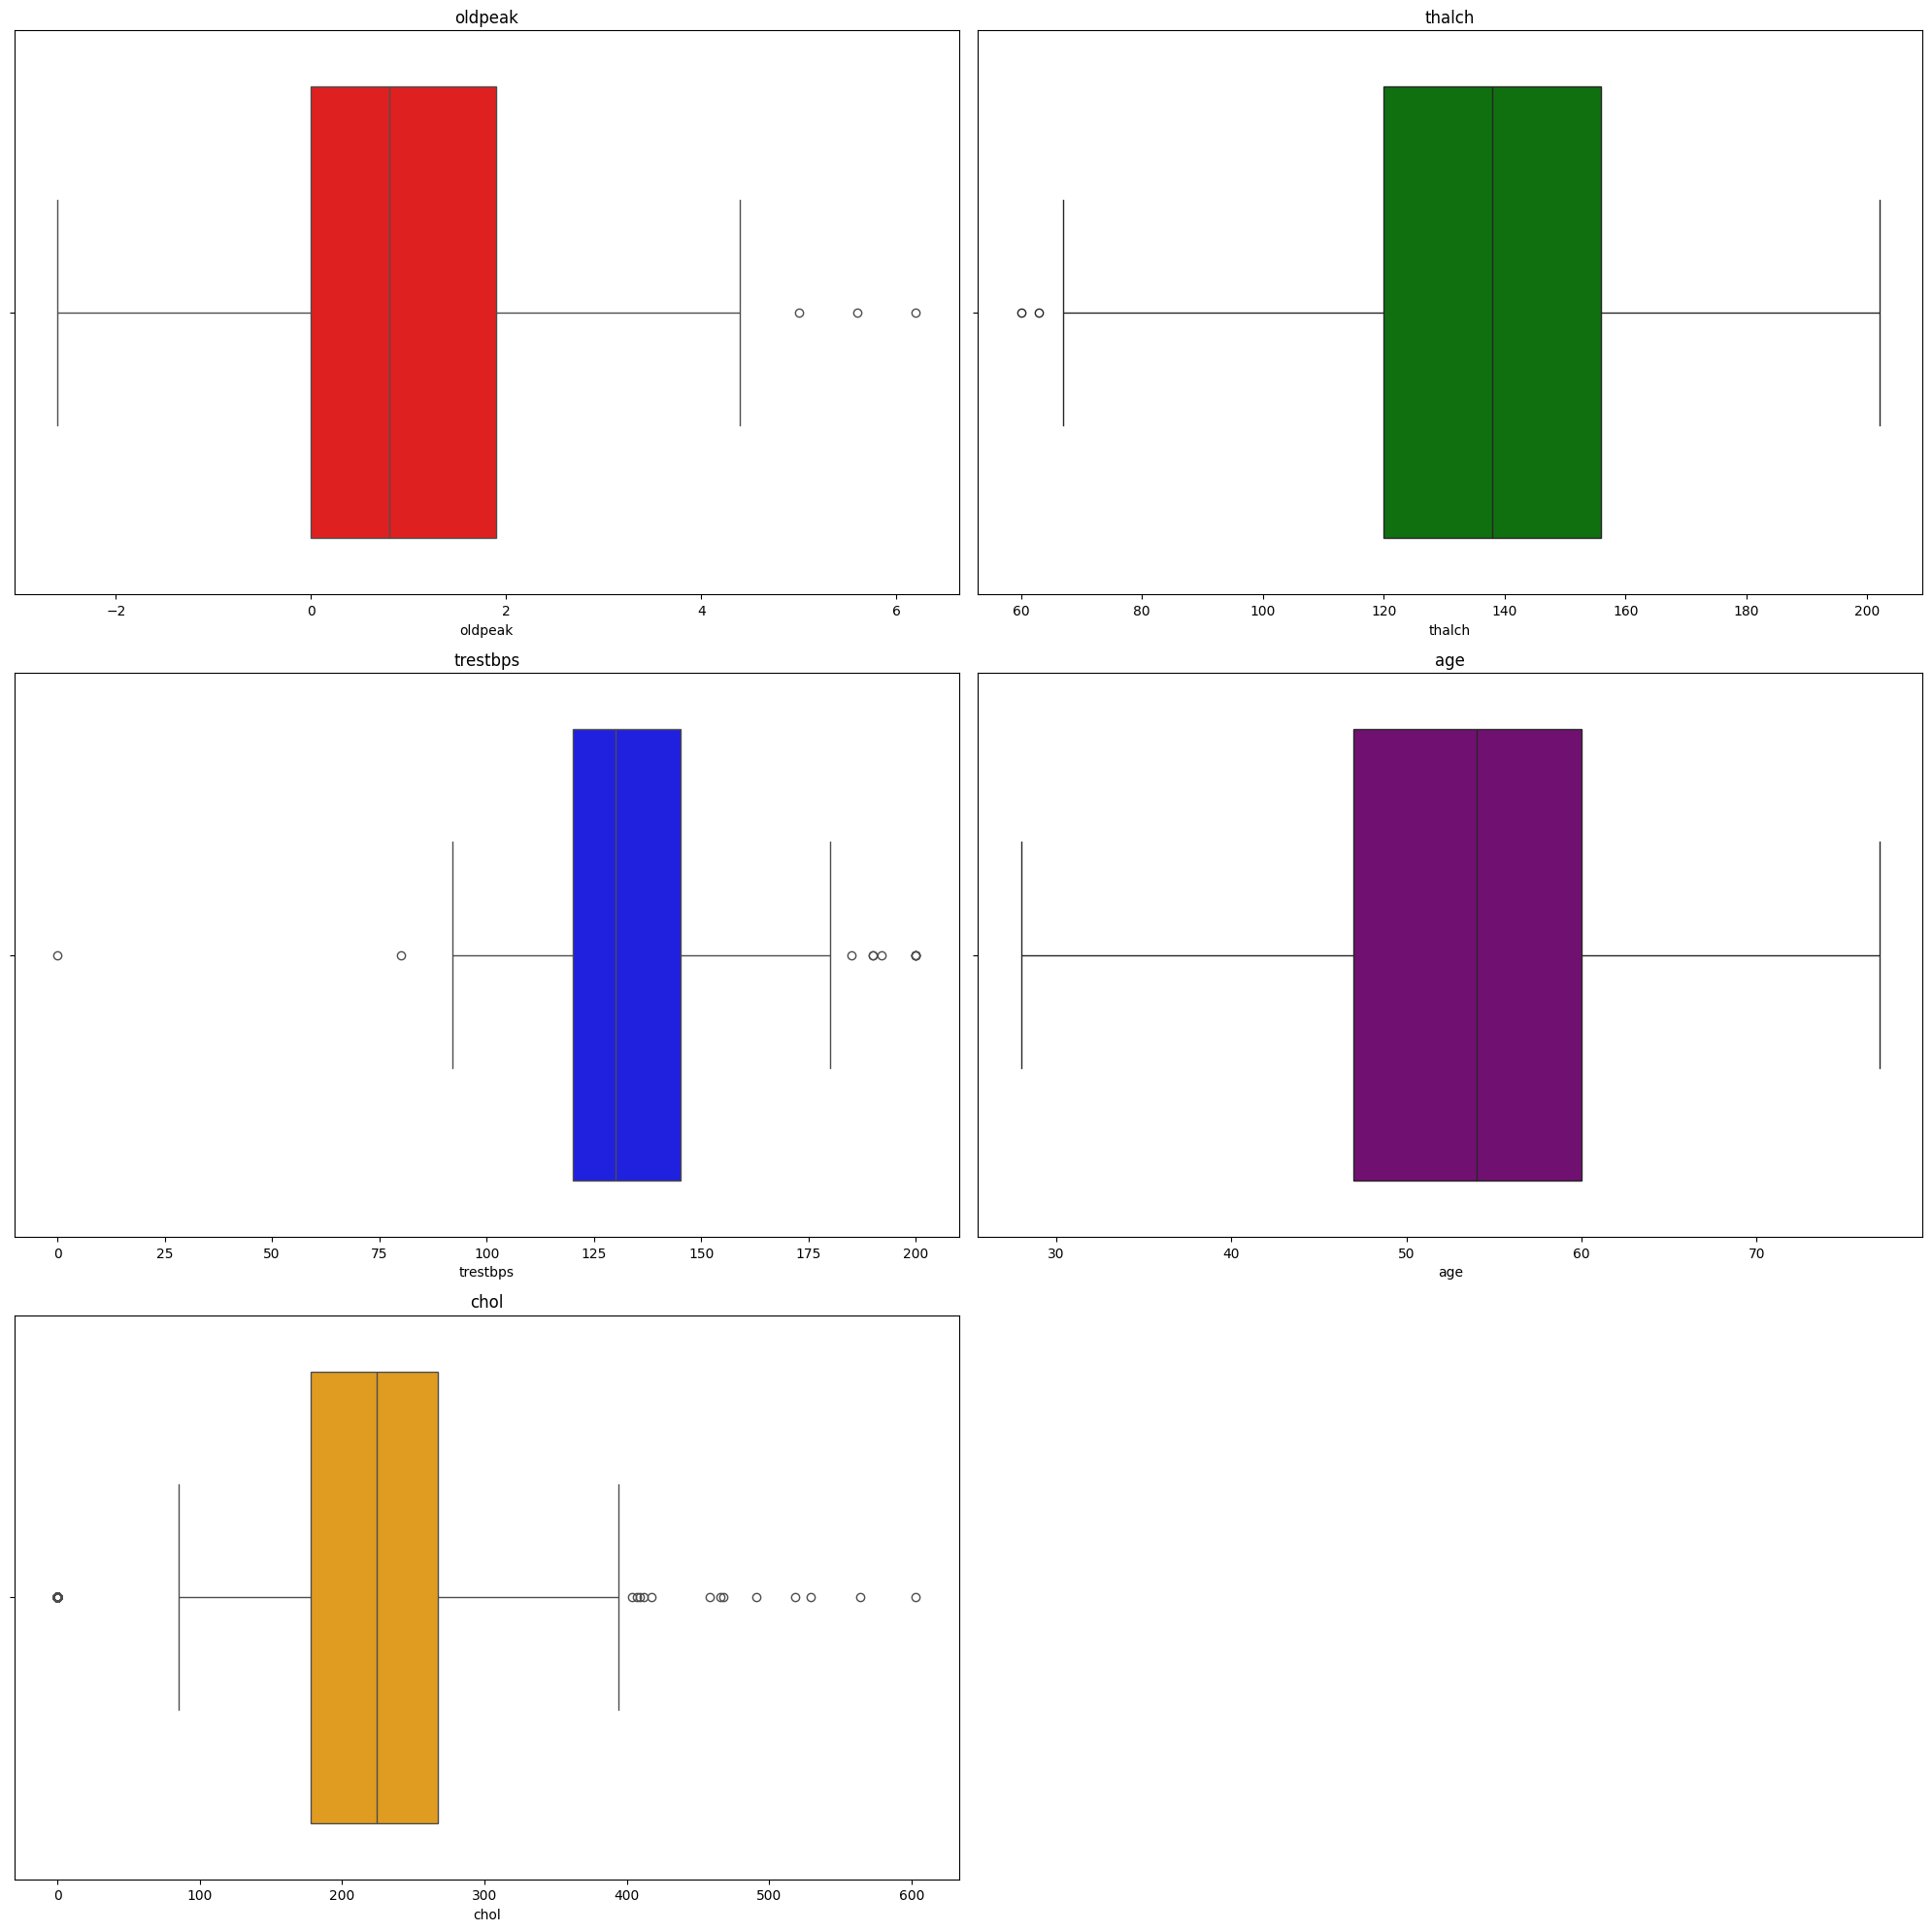

In [508]:
# create a box plots for all numeric columns using for loop and subplot 
plt.figure(figsize=(20,20))

colors = ['red', 'green', 'blue', 'purple', 'orange']

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x=col, color=colors[i])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [509]:
# make box plots of all the numeric columns using for loop and plotly
for col in numerical_cols:
    fig = px.box(df, x=col)
    fig.show()

In [510]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data 
df = df[df['trestbps'] != 0]

In [511]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,bp_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Hypertension (Stage 1)
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Hypertension (Stage 2)
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Normal
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Prehypertension
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Prehypertension


Upon analyzing this dataset, it was observed that there are `some data points that may appear as outliers`. But a closer inspection reveals that `many of these datapoints are not actual outliers` but ratherd valid extreme values that the natural variability in the data.

---

## **Scaling**

---

In [512]:
# features and target varibales 
X = df.drop('num', axis=1)
y = df['num']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
            ('scaler', StandardScaler())  # Placeholder, will be replaced by specific scalers later
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
        ]), categorical_features)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [513]:
def evaluate_scaler(scaler, X_train, X_test, y_train, y_test):
    # Update the scaler in the preprocessor pipeline
    preprocessor.set_params(num__scaler=scaler)
    
    # Apply preprocessing
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Train a model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_preprocessed, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [514]:
# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer()
}

# Evaluate each scaler
results = {}
for name, scaler in scalers.items():
    accuracy = evaluate_scaler(scaler, X_train, X_test, y_train, y_test)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Find the best scaler
best_scaler = max(results, key=results.get)
print(f"\nBest Scaler: {best_scaler} with Accuracy = {results[best_scaler]:.4f}")


StandardScaler: Accuracy = 0.6522
MinMaxScaler: Accuracy = 0.6522
RobustScaler: Accuracy = 0.6558
Normalizer: Accuracy = 0.6667

Best Scaler: Normalizer with Accuracy = 0.6667


In [515]:
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
bp_group     object
dtype: object


In [517]:
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'bp_group']

# apply one hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = df_encoded.drop('num', axis=1)  # Features
y = df_encoded['num']  # Target variable

In [518]:
# intialize the standard scaler 
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

In [519]:
# convert scaled features to dataframe 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# combined scaled features with target variable
df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1) 

In [522]:
df_scaled.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,bp_group_Hypertension (Stage 2),bp_group_Hypertensive Crisis,bp_group_Normal,bp_group_Prehypertension,num
0,-1.729176,1.007024,0.641056,0.295721,0.521747,1.187169,-0.663636,0.517287,-0.684143,-0.393094,...,-0.841533,-1.121599,-0.736170,-0.762729,-1.149220,-0.319247,-0.09371,-0.682429,-0.623071,0
1,-1.725410,1.431447,1.460271,0.781399,-1.135237,0.471953,3.077967,0.517287,-0.684143,-0.393094,...,1.188307,0.891584,-0.736170,1.311082,-1.149220,3.132374,-0.09371,-0.682429,-0.623071,2
2,-1.721645,1.431447,-0.724302,0.259066,-0.306745,1.455375,1.830766,0.517287,-0.684143,-0.393094,...,1.188307,0.891584,-0.736170,-0.762729,0.870155,-0.319247,-0.09371,1.465353,-0.623071,1
3,-1.717879,-1.751727,-0.178159,0.451504,1.981471,2.259993,-0.663636,0.517287,-0.684143,-0.393094,...,-0.841533,-1.121599,-0.736170,1.311082,-1.149220,-0.319247,-0.09371,-0.682429,1.604953,0
4,-1.714113,-1.327304,-0.178159,0.029973,1.389691,0.382551,-0.663636,-1.933162,-0.684143,-0.393094,...,-0.841533,-1.121599,1.358382,1.311082,-1.149220,-0.319247,-0.09371,-0.682429,1.604953,0


For Classification Tasks, we can skip scaling the target variable and just focus on scaling the features.

---

1. **Feature and Target Variable Identification:**
   - **Features (`X`)**: All columns except the target variable (`num`).
   - **Target (`y`)**: The `num` column, which is the target variable for prediction.

2. **Categorical and Numerical Features:**
   - **Categorical Features**: Identified using `object` data type.
   - **Numerical Features**: Identified using `int64` and `float64` data types.

3. **Preprocessing Pipeline Definition:**
   - **Numerical Features Pipeline:**
     - **Imputation**: Missing values are handled using median imputation (`SimpleImputer(strategy='median')`).
     - **Scaling**: Placeholder for scaling, to be replaced with specific scalers later.
   - **Categorical Features Pipeline:**
     - **Imputation**: Missing values are handled using the most frequent value (`SimpleImputer(strategy='most_frequent')`).
     - **Encoding**: Categorical features are encoded using one-hot encoding (`OneHotEncoder(handle_unknown='ignore')`).

4. **Train-Test Split:**
   - The dataset is split into training and testing sets using a 70-30 split (`test_size=0.3`) and a random seed for reproducibility (`random_state=42`).

5. **Scaler Evaluation Function:**
   - **Purpose**: Evaluates the performance of different scalers by fitting a `RandomForestClassifier` on the preprocessed data.
   - **Steps:**
     - Update the scaler in the preprocessing pipeline.
     - Transform the training and testing data using the updated pipeline.
     - Train the `RandomForestClassifier` on the preprocessed training data.
     - Predict and calculate the accuracy on the preprocessed test data.
   - **Outputs**: Returns the accuracy score for the given scaler.

6. **Scaler Evaluation:**
   - **Scalers Evaluated**:
     - `StandardScaler`
     - `MinMaxScaler`
     - `RobustScaler`
     - `Normalizer`
   - **Results**: Accuracy scores for each scaler are computed and printed.
   - **Best Scaler**: Identified as the scaler with the highest accuracy.

7. **Categorical Encoding:**
   - **One-Hot Encoding**: Applied to categorical columns using `pd.get_dummies()`, with the first category dropped to avoid multicollinearity.

8. **Data Scaling:**
   - **Standard Scaler**: Used to scale the features of the encoded dataset.
   - **Transformation**: Scaled features are converted into a DataFrame and combined with the target variable.

---


---

<h1 style="font-family: 'poppins'; font-weight: bold; color: White;">Machine Learning</h1>

---

In [ ]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. the unique values in this column are: [0,1,2,3,4] which states that there are 5 types of heart disease:
- 0: No heart disease
- 1: Mild heart disease
- 2: moderate heart disease
- 3: severe heart disaese
- 4: critical heart disease

In [523]:
# split the data into X and y 
X = df_scaled.drop('num', axis=1)
y = df_scaled['num']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.**

* logistic regression
* KNN
* NB
* SVM
* Decision Tree
* Random Forest
* XGBoost
* GradientBoosting
* AdaBoost
* lightGBM

---
## Hyperparameters Explained

### 1. Random Forest
- **`n_estimators`**: Number of trees in the forest. More trees usually improve performance but increase computation time.
  - Options: `[100, 200]`
- **`max_depth`**: Maximum depth of each tree. Limits the number of nodes in each tree, controlling overfitting.
  - Options: `[None, 10, 20]` (None means nodes are expanded until all leaves are pure or contain fewer than `min_samples_split` samples.)
- **`min_samples_split`**: Minimum number of samples required to split an internal node. Prevents the model from learning overly specific patterns.
  - Options: `[2, 5, 10]`
- **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node. Helps control overfitting.
  - Options: `[1, 2, 4]`

### 2. Gradient Boosting
- **`n_estimators`**: Number of boosting stages to be run. More stages improve performance but can lead to overfitting.
  - Options: `[100, 200]`
- **`learning_rate`**: Step size at each iteration while moving toward a minimum of the loss function. Lower values make the model more robust but require more trees.
  - Options: `[0.01, 0.1, 1]`
- **`max_depth`**: Maximum depth of the individual trees. Controls the complexity of the individual trees.
  - Options: `[3, 5, 7]`

### 3. Support Vector Machine (SVM)
- **`C`**: Regularization parameter. A higher value of `C` aims to fit the training data better, while a lower value makes the model more tolerant of misclassification.
  - Options: `[0.1, 1, 10]`
- **`kernel`**: Specifies the kernel type to be used in the algorithm. 
  - Options: `['linear', 'rbf']` (Linear or Radial Basis Function)
- **`gamma`**: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’ kernels. Controls how far the influence of a single training example reaches.
  - Options: `['scale', 'auto']` (Scale is `1 / (n_features * X.var())`, auto is `1 / n_features`)

### 4. Logistic Regression
- **`C`**: Inverse of regularization strength. Smaller values specify stronger regularization.
  - Options: `[0.1, 1, 10]`
- **`solver`**: Algorithm to use for optimization. Different solvers handle large datasets and regularization differently.
  - Options: `['newton-cg', 'lbfgs', 'liblinear']` (newton-cg, lbfgs, and liblinear are optimization algorithms)

### 5. K-Nearest Neighbors (KNN)
- **`n_neighbors`**: Number of neighbors to use by default for `kneighbors` queries. Affects the decision boundary.
  - Options: `[3, 5, 7, 10]`
- **`weights`**: Weight function used in prediction. 
  - Options: `['uniform', 'distance']` (Uniform: all points have the same weight, Distance: closer points have more influence)
- **`p`**: Power parameter for the Minkowski distance metric. 
  - Options: `[1, 2]` (1 for Manhattan distance, 2 for Euclidean distance)

### 6. Decision Tree
- **`max_depth`**: Maximum depth of the tree. Controls the complexity and overfitting.
  - Options: `[None, 10, 20]`
- **`min_samples_split`**: Minimum number of samples required to split an internal node.
  - Options: `[2, 5, 10]`
- **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node.
  - Options: `[1, 2, 4]`

### 7. Ada Boost
- **`n_estimators`**: Number of estimators to use. More estimators can improve performance but increase computation time.
  - Options: `[50, 100, 200]`
- **`learning_rate`**: Learning rate shrinks the contribution of each estimator.
  - Options: `[0.01, 0.1, 1]`

### 8. XG Boost
- **`n_estimators`**: Number of boosting rounds. Affects the number of trees in the model.
  - Options: `[100, 200]`
- **`learning_rate`**: Step size shrinkage to prevent overfitting.
  - Options: `[0.01, 0.1, 0.2]`
- **`max_depth`**: Maximum depth of the trees. Controls complexity.
  - Options: `[3, 5, 7]`
- **`subsample`**: Fraction of samples to be used for fitting the trees.
  - Options: `[0.8, 1.0]` (0.8 is a subset, 1.0 uses all data)

### 9. Naive Bayes
- **`priors`**: Prior probabilities of the classes. 
  - Options: `[None]` (Uniform priors are used if `None`)

--- 

In [525]:
# import all models 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# import Metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [526]:
# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Ada Boost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XG Boost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'Naive Bayes': {
        # Naive Bayes typically has fewer hyperparameters, but you can still experiment
        # with things like priors if needed
        'priors': [None]  # Uniform priors
    }
}

In [527]:
# create a list of models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# perform grid search for each model 
for name, model in models:
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    
    # Evaluate the model on test data
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")

Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.6905886627906976
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       117
           1       0.67      0.57      0.62        87
           2       0.31      0.15      0.20        33
           3       0.50      0.59      0.54        34
           4       0.00      0.00      0.00         5

    accuracy                           0.67       276
   macro avg       0.45      0.45      0.44       276
weighted avg       0.63      0.67      0.64       276


Running GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best score for Gradient Boosting: 0.6734253875968992
Classification report for Gradient Boosting:
           

In [528]:
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6828246124031008
Test Accuracy: 0.6594202898550725

Model: Gradient Boosting
Cross-validation Accuracy: 0.6703125
Test Accuracy: 0.6920289855072463

Model: Support Vector Machine
Cross-validation Accuracy: 0.6283672480620155
Test Accuracy: 0.6304347826086957

Model: Logistic Regression
Cross-validation Accuracy: 0.6360828488372092
Test Accuracy: 0.6195652173913043

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6004360465116279
Test Accuracy: 0.5652173913043478

Model: Decision Tree
Cross-validation Accuracy: 0.6236797480620154
Test Accuracy: 0.6340579710144928

Model: Ada Boost
Cross-validation Accuracy: 0.6003391472868217
Test Accuracy: 0.5688405797101449

Model: XG Boost
Cross-validation Accuracy: 0.6749273255813953
Test Accuracy: 0.6557971014492754

Model: Naive Bayes
Cross-validation Accuracy: 0.36873788759689924
Test Accuracy: 0.358695652173913

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state


---

### Model Evaluation and Selection

1. **Initialization:**
   - `best_model` is set to `None` and `best_accuracy` is initialized to `0.0` to keep track of the best-performing model.

2. **Model Evaluation Loop:**
   - Iterate through each model in the `models` list.

3. **Pipeline Creation:**
   - A `Pipeline` is created for each model. Currently, the pipeline includes only the model, but you could include additional steps such as imputation or encoding if needed.

4. **Cross-Validation:**
   - Perform 5-fold cross-validation on the training data (`X_train`, `y_train`) to estimate the model's performance.
   - `cross_val_score` is used to compute accuracy scores for each fold.
   - The mean accuracy across folds is calculated and stored in `mean_accuracy`.

5. **Model Fitting:**
   - The pipeline is fitted on the entire training data.

6. **Prediction and Accuracy Calculation:**
   - Predictions are made on the test data (`X_test`).
   - The accuracy of these predictions is calculated using `accuracy_score`.

7. **Performance Metrics:**
   - Print the model name, cross-validation accuracy, and test accuracy.

8. **Best Model Selection:**
   - Check if the current model's test accuracy is greater than the best accuracy recorded so far.
   - If so, update `best_accuracy` and set `best_model` to the current pipeline.

9. **Retrieve Best Model:**
   - After evaluating all models, print the best model based on test accuracy.

---


In [529]:
# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

## **Observations and Analysis**

#### `1. Age Observations:`

* **Minimum Age:** The minimum age to have heart disease starts from 28 years old.
* **Most Common Age Range:** Most people get heart disease at the age of 53-54 years.
* **Age by Gender:** The age at which most males and females have heart disease is between 54-55 years.


#### `2. Gender Distribution:`

* **Male Percentage:** 78.91%
* **Female Percentage:** 21.09%
* **Gender Ratio:** Males are 274.23% more than females in the dataset.


#### `3. Geographical Distribution:`

* **Highest Number of People:** Cleveland (304)
* **Lowest Number of People:** Switzerland (123)
* **Highest Number of Females:** Cleveland (97)
* **Lowest Number of Females:** VA Long Beach (6)
* **Highest Number of Males:** Hungary (212)
* **Lowest Number of Males:** Switzerland (113)


#### `4. Age Statistics by Dataset:`

**Observations for Age Statistics by Dataset:**

| Dataset         | Mean      | Median | Mode |
|-----------------|-----------|--------|------|
| Cleveland       | 54.352    | 55.5   | 58   |
| Hungary         | 47.894    | 49.0   | 54   |
| Switzerland     | 55.317    | 56.0   | 61   |
| VA Long Beach   | 59.372    | 60.0   | 62   |


#### `5. Observations from cp (Chest Pain Type) Column:`

| Chest Pain Type     | Count |
|---------------------|-------|
| Asymptomatic        | 496   |
| Non-anginal         | 203   |
| Atypical Angina     | 174   |
| Typical Angina      | 46    |


#### `6. Imputing Missing Values`


- **Identified Missing Values:**
  - Missing values were found in specific columns across the dataset, with varying degrees of extent.

- **Chosen Imputation Strategies:**
  - **Numeric Data:** Median was selected for imputation due to its robustness against outliers. (Mean could be used if preferred.)
  - **Categorical Data:** Mode was used for imputation to preserve the most frequent values in each category.
  - **KNN Imputer, Simple Imputer, Iterative Imputer**

- **Implementation:**
  - Numeric columns were imputed using the median value, ensuring that extreme values did not skew the imputation.
  - Categorical columns were imputed using the mode, maintaining the most common category values.

- **Verification:**
  - Post-imputation checks confirmed that all missing values were appropriately handled and imputed, ensuring the integrity of the dataset.

- **Reasoning:**
  - The chosen strategies for imputation are effective in maintaining data quality and consistency, with the median providing robustness to outliers and the mode reflecting common categorical values.


#### `7. Dealing with Outliers:`

1. **Identification:**
   - Outliers were detected using various methods, and visualized with box plots.

2. **Handling Methods:**
   - **Removal:** Extreme outliers were removed if deemed errors or irrelevant.


#### `8. Data Scaling:`

- Data was scaled to standardize feature ranges and improve model performance.


#### `9. Model Application:`

- Various machine learning models were applied to the scaled dataset to evaluate their performance.


#### `10. Hyperparameter Tuning:`

- Hyperparameters for each model were optimized to achieve the best possible performance.


#### `11. Model Saving:`

The model with the highest accuracy was selected and saved for future use.

---

<h1 style="font-family: 'poppins'; font-weight: bold; color: White;">👨‍💻Author: Muhammad Hassaan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/MHassaan2) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


---